In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math


In [2]:
# Load data
data = pd.read_csv('sales_data.csv')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item               320 non-null    object
 1   Description        320 non-null    object
 2   Unit cost          320 non-null    int64 
 3   Lead time          320 non-null    int64 
 4   Min order quality  320 non-null    int64 
 5   Max order quality  320 non-null    int64 
 6   current stock      320 non-null    int64 
 7   Backoder quantity  320 non-null    int64 
 8   Reoder point       320 non-null    int64 
 9   Saftey Stock       320 non-null    int64 
 10  Demand forecast    320 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 27.6+ KB


<AxesSubplot:>

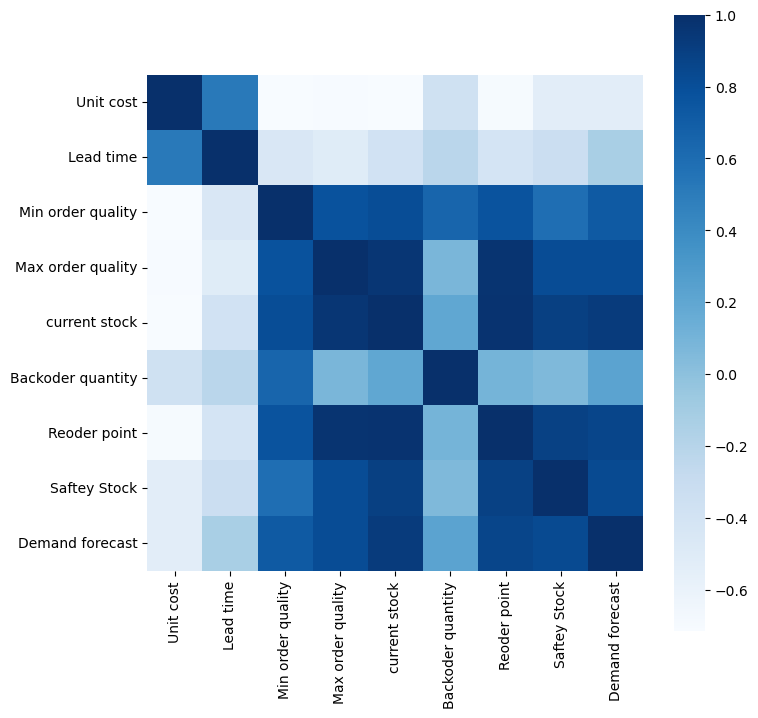

In [3]:
# find correlation between data 
correlation= data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':8},cmap='Blues')

In [4]:

# Define input and output variables
X = data.drop(['Item', 'Description', 'Unit cost'], axis=1)
y = data['Unit cost']



In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:

# Make predictions on test set
y_pred = model.predict(X_test)



In [8]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 50277.43784144941


In [9]:
 re_or=[]
for i, item in data.iterrows():
    current_stock = item['current stock']
    backorder_quantity = item['Backoder quantity']
    reorder_point = item['Reoder point']
    safety_stock = item['Saftey Stock']
    demand_forecast = item['Demand forecast']
    lead_time = item['Lead time']
    min_order_quantity = item['Min order quality']
    max_order_quantity = item['Max order quality']
    expected_demand = model.predict([[lead_time, min_order_quantity, max_order_quantity, current_stock, backorder_quantity, reorder_point, safety_stock, demand_forecast]])
    reorder_quantity = max(expected_demand - current_stock - backorder_quantity - reorder_point - safety_stock, 0)
    re_or.append( math.floor(reorder_quantity/item['Unit cost']))
    print(f"Recommended reorder quantity for {item['Item']}: {math.floor(reorder_quantity/item['Unit cost'])}")

Recommended reorder quantity for  BH150E Electric Dump Truck : 3
Recommended reorder quantity for  BE1800E Electric Excavator : 0
Recommended reorder quantity for  BD50 Bulldozer : 0
Recommended reorder quantity for  BH205E Electric Haul Truck : 0
Recommended reorder quantity for  BG605 Motor Grader : 1
Recommended reorder quantity for BH200E Electric Excavator : 1
Recommended reorder quantity for  BD80 Bulldozer : 1
Recommended reorder quantity for BH300E Electric Excavator : 0
Recommended reorder quantity for  BH205i Haul Truck : 1
Recommended reorder quantity for BPR45 Piling Rig : 0
Recommended reorder quantity for  BH100E Electric Dump Truck : 1
Recommended reorder quantity for  BH85E Electric Bulldozer : 0
Recommended reorder quantity for  BG405A Motor Grader : 0
Recommended reorder quantity for  BH150E AC Electric Dump Truck : 1
Recommended reorder quantity for  BH85E Electric Bulldozer : 0
Recommended reorder quantity for  BH205E Electric Haul Truck : 0
Recommended reorder quan

C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PREETHIMA KRISHNA\anaconda old\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\PREETH

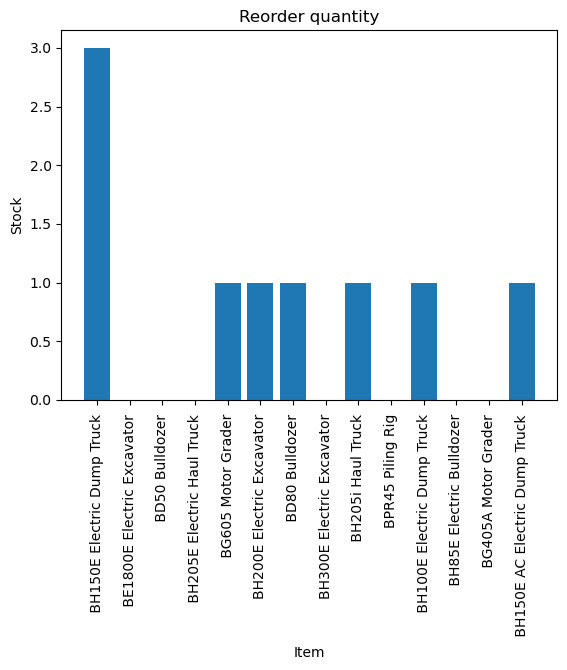

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

int_arr=[]
for i in re_or:
    int_arr.append(int(i))

# Create the bar plot
plt.bar(data['Item'],int_arr)

# Customize the plot
plt.xlabel('Item')
plt.ylabel('Stock')
plt.title('Reorder quantity')
plt.xticks(rotation=90)  

# Display the plot
plt.show()


